# Tokyo demographics

In [12]:
from client import fetch_stats
import pandas
from datetime import datetime

response = fetch_stats('0003411563')
data = response.data
for d in data:
    d['@cat01'] = response.labels['cat01'][d['@cat01']]
    d['@area'] = response.labels['area'][d['@area']]
    d['@time'] = datetime.strptime(response.labels['time'][d['@time']], '%Y年')
df = pandas.DataFrame(data)
df = df.rename(columns={'@cat01': 'Type', '@area': 'Area', '@time': 'Year', '@unit': 'Unit', '$': 'Value'})
df['Value'] = df['Value'].apply(pandas.to_numeric, errors='coerce')
df

,Type,Area,Year,Unit,Value
0,出生数,全国,2021-01-01,人,811622.00
1,出生数,全国,2020-01-01,人,840835.00
2,出生数,全国,2019-01-01,人,865239.00
3,出生数,全国,2018-01-01,人,918400.00
4,出生数,全国,2017-01-01,人,946146.00
...,...,...,...,...,...
29815,離婚率,熊本市,2019-01-01,人口千対,1.79
29816,離婚率,熊本市,2018-01-01,人口千対,1.76
29817,離婚率,熊本市,2017-01-01,人口千対,1.62
29818,離婚率,熊本市,2016-01-01,人口千対,1.70


In [13]:
df['Type'].drop_duplicates()

0                     出生数
1065           2500g未満出生数
2130                  死亡数
3195          乳児（１歳未満）死亡数
4260       新生児（生後4週未満）死亡数
5325                自然増減数
6390                  死産数
7455                自然死産数
8520                人工死産数
9585               周産期死亡数
10650        妊娠満22週以後の死産数
11715    早期新生児（生後1週未満）死亡数
12780                婚姻件数
13845                離婚件数
14910                 出生率
15975                出生性比
17040                 死亡率
18105               乳児死亡率
19170              新生児死亡率
20235               自然増減率
21300                 死産率
22365               自然死産率
23430               人工死産率
24495              周産期死亡率
25560        妊娠満22週以後の死産率
26625            早期新生児死亡率
27690                 婚姻率
28755                 離婚率
Name: Type, dtype: object

In [14]:
tokyo = df[df['Area'] == '東京都'].drop('Area', axis=1)
tokyo

,Type,Year,Unit,Value
208,出生数,2021-01-01,人,95404.00
209,出生数,2020-01-01,人,99661.00
210,出生数,2019-01-01,人,101818.00
211,出生数,2018-01-01,人,107150.00
212,出生数,2017-01-01,人,108990.00
...,...,...,...,...
28974,離婚率,1999-01-01,人口千対,2.30
28975,離婚率,1998-01-01,人口千対,2.21
28976,離婚率,1997-01-01,人口千対,2.04
28977,離婚率,1996-01-01,人口千対,1.92


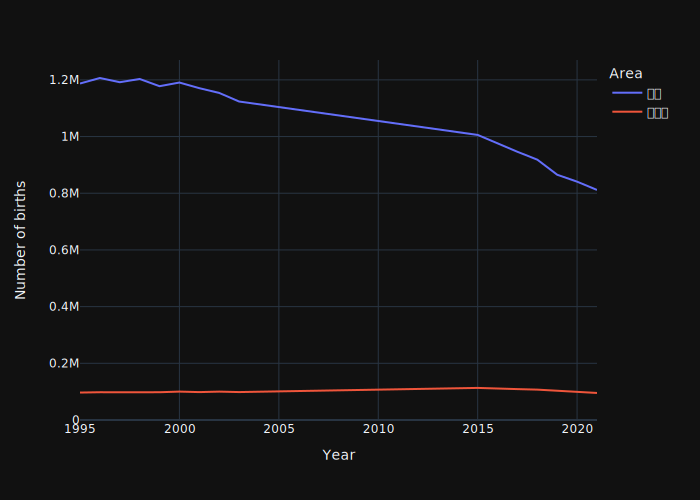

In [15]:
import plotly.express as px

data = df[df['Area'].isin(['東京都', '全国'])]
births = data[data['Type'] == '出生数'].drop('Type', axis=1)
fig = px.line(births, x='Year', y='Value', color='Area', labels={'Value': 'Number of births'})
fig.update_yaxes(rangemode='tozero')
fig.show('svg')

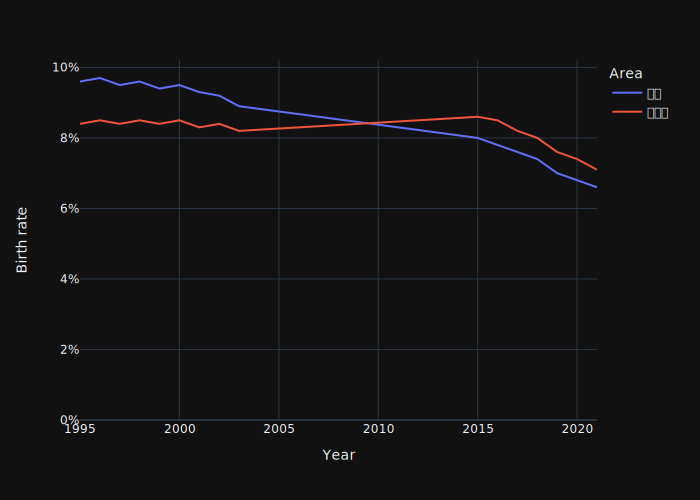

In [16]:
data = df[df['Area'].isin(['東京都', '全国'])]
births = data[data['Type'] == '出生率'].drop('Type', axis=1)
fig = px.line(births, x='Year', y='Value', color='Area', labels={'Value': 'Birth rate'})
fig.update_layout(yaxis_ticksuffix='%')
fig.update_yaxes(rangemode='tozero')
fig.show('svg')

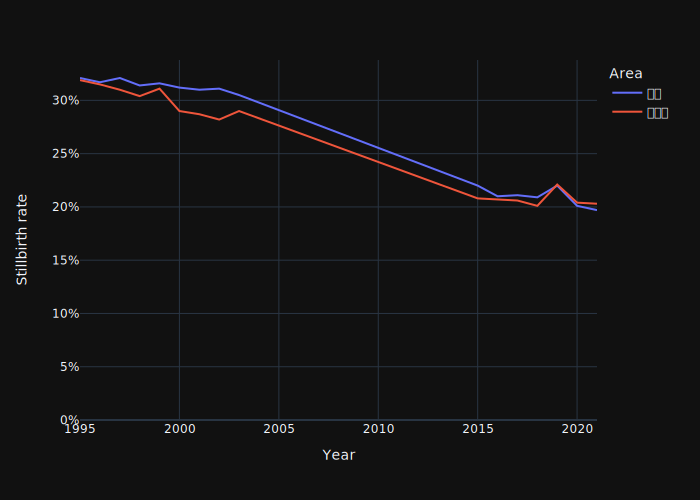

In [17]:
data = df[df['Area'].isin(['東京都', '全国'])]
stillbirths = data[data['Type'] == '死産率'].drop('Type', axis=1)
fig = px.line(stillbirths, x='Year', y='Value', color='Area', labels={'Value': 'Stillbirth rate'})
fig.update_layout(yaxis_ticksuffix='%')
fig.update_yaxes(rangemode='tozero')
fig.show('svg')

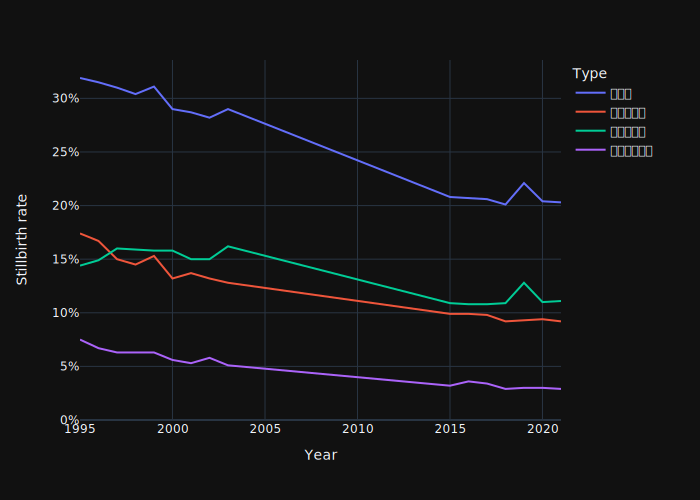

In [21]:
rate = tokyo[tokyo['Type'].isin(['死産率', '自然死産率', '人工死産率', '周産期死亡率'])]
fig = px.line(rate, x='Year', y='Value', color='Type', labels={'Value': 'Stillbirth rate'})
fig.update_layout(yaxis_ticksuffix='%')
fig.update_yaxes(rangemode='tozero')
fig.show('svg')